In [1]:
import pandas as pd
import numpy as np
import datetime

from datetime import date, datetime, time, timezone

datetime(2021, 7, 7)
pd.Timestamp('2017-01-01')
pd.Timestamp('2017-01-01 12:00:00')

my_birth = datetime(1973, 7, 7)
today = datetime.today()
tomorrow = today + pd.Timedelta(days=1)

print(tomorrow - my_birth)


18618 days, 9:03:25.383963


In [2]:
today = datetime.today()
data = today + pd.Timedelta(hours = 10)

print(today)
print(data)

2024-06-26 09:03:25.389439
2024-06-26 19:03:25.389439


In [3]:
pd.Period() # NaT
# pd.date_range(start = None, end = None, periods=None, freq = None, tz=None, normalize=False, name=None, closed=None)

NaT

In [4]:
pd.date_range(start = '2021-01-01', end = '2021-12-31', periods = 5, freq = None, tz = 'Asia/Seoul')

DatetimeIndex(['2021-01-01 00:00:00+09:00', '2021-04-02 00:00:00+09:00',
               '2021-07-02 00:00:00+09:00', '2021-10-01 00:00:00+09:00',
               '2021-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

<h2>Let's Code</h2>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        12741 non-null  object 
 1   Code                                                          10122 non-null  object 
 2   Year                                                          12741 non-null  int64  
 3   Fish and seafood | 00002960 || Production | 005511 || tonnes  12741 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 398.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 3 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        ----

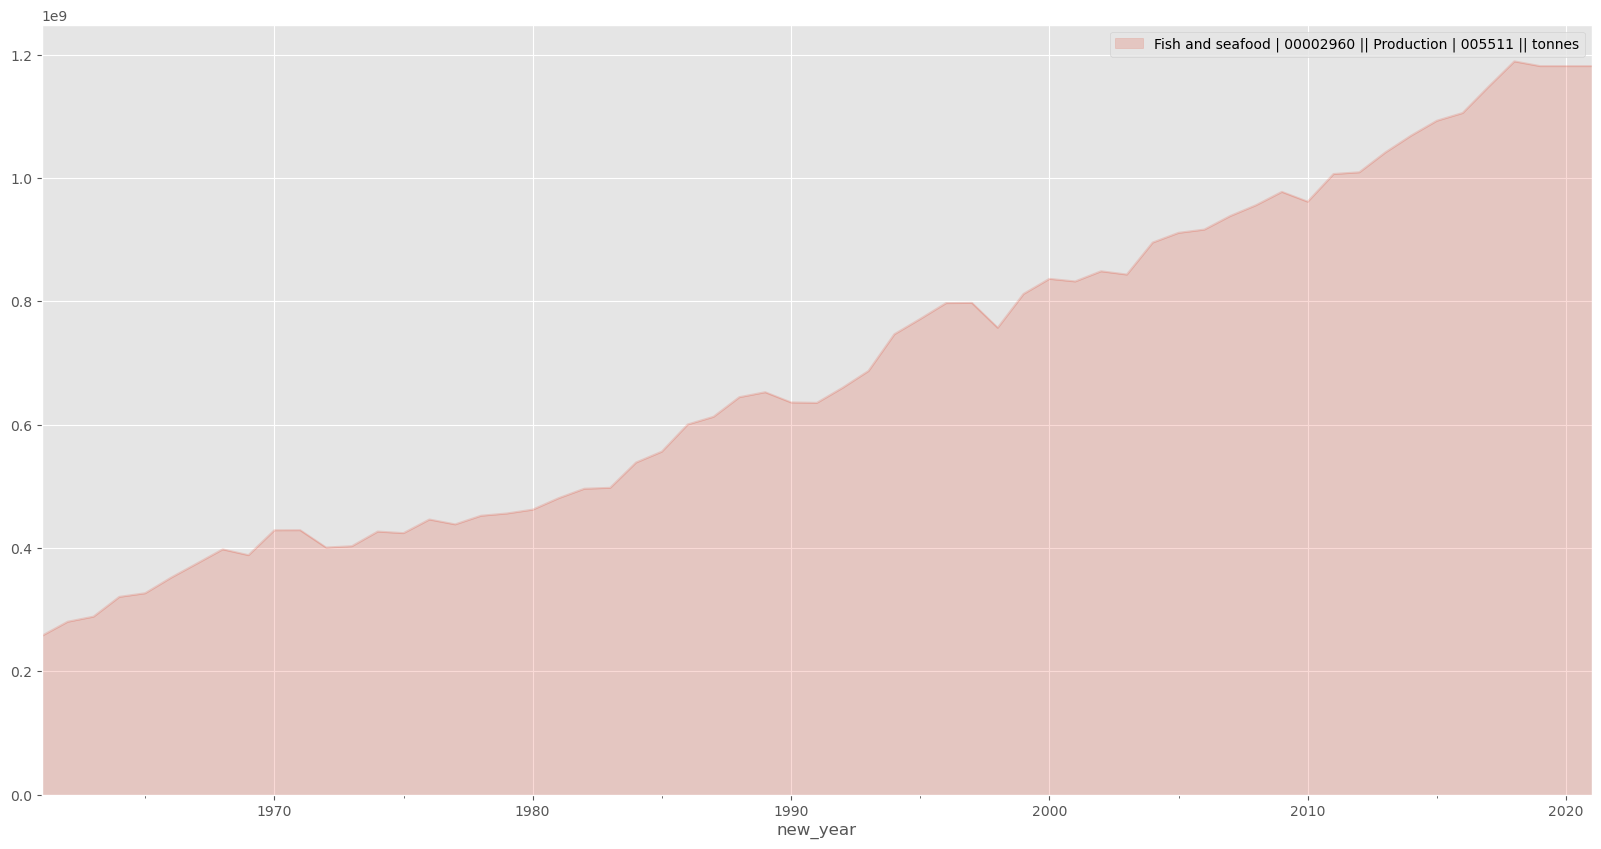

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./fish-production.csv')
df.head()

print(df.info())

df.drop(['Code'], axis=1, inplace=True)
df.head()

df.isnull().sum()

change_value = 0
df.fillna(change_value, inplace=True)
df.isnull().sum()

df['new_year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')
df.drop(['Year'], axis=1, inplace=True)
df.head()

new_df = df.sort_index()
new_df['Entity'] = new_df['Entity'].astype('category')
new_df.info()

new_df['Entity'].value_counts()

g = new_df.groupby(['new_year'])
world_total = g.sum(numeric_only=True)
plt.style.use('ggplot')
world_total.plot(kind = 'area', alpha = 0.2, stacked = False, figsize=(20, 10))
plt.legend()
plt.show()

In [10]:
# Print column names to verify them
print(new_df.columns)

# Assuming column names are verified and corrected as needed
s = new_df.loc[new_df['Entity'] == 'South Korea']
c = new_df.loc[new_df['Entity'] == 'China']
a = new_df.loc[new_df['Entity'] == 'Afghanistan']

# Correct column names after verification
# Replace 'Corrected_Aquaculture_Column' and 'Corrected_Capture_Column' with actual column names
s_y = s[['Actual_Aquaculture_Column', 'Actual_Capture_Column']]
s_x = s.index
c_y = c[['Actual_Aquaculture_Column', 'Actual_Capture_Column']]
c_x = c.index
a_y = a[['Actual_Aquaculture_Column', 'Actual_Capture_Column']]
a_x = a.index

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(s_x, s_y)
axs[1].plot(c_x, c_y)
axs[2].plot(a_x, a_y)
fig.suptitle('Fish Production')
plt.show()


Index(['Entity',
       'Fish and seafood | 00002960 || Production | 005511 || tonnes',
       'new_year'],
      dtype='object')


KeyError: "None of [Index(['Actual_Aquaculture_Column', 'Actual_Capture_Column'], dtype='object')] are in the [columns]"